# Importing the file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\pc\OneDrive\Documents\Python_DA\weather_analysis\data\weather_dataset.csv")

#### Let's take a look

In [5]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
data.shape

(8784, 8)

In [8]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [9]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [10]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [11]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [12]:
data['Weather'].value_counts() # the weather was mainly clear most of the time throughout this data

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


# Analyzing the data

### Find out all the null values

In [14]:
data.isnull().sum() # shows that no column has null values

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### Renaming

In [15]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [16]:
data.rename(columns = {'Temp_C' : 'temp', 'Date/Time' : 'date','Dew Point Temp_C' : 'dew_point_temp', 'Rel Hum_%' : 'rel_hum', 'Wind Speed_km/h' : 'wind_speed', 'Visibility_km' : 'visibility_km', 'Press_kPa':'press_kpa', 'Weather':'weather' }, inplace = True)

In [ ]:
# Let's look at the temperature details

print(data.temp.describe())

print(f"Average temperature is {data.temp.mean()}")
print(f"Minimum is {data.temp.min()}")
print(f"Maximum temperature is {data.temp.max()}")


In [ ]:
# finding the average humidity on rainy days 

avg_humidity_rain = data[data['weather'].str.contains('Rain')] ['rel_hum'].mean()
print(avg_humidity_rain)

83.31930333817127


In [ ]:
# finding the days that are cold and humid

cold_humid = data[(data['temp'] < 0) & (data['rel_hum'] > 80)]

print(cold_humid[['temp', 'rel_hum', 'weather']].head())
print(f"\n {len(cold_humid)}")

# there are 543 days where its cold (< 0 degress) and the humidity is very high ( > 80 )

   temp  rel_hum               weather
0  -1.8       86                   Fog
1  -1.8       87                   Fog
2  -1.8       89  Freezing Drizzle,Fog
3  -1.5       88  Freezing Drizzle,Fog
4  -1.5       88                   Fog

 543


In [ ]:
# finding the average temperature on the days that was clear

avg_temp_clear_days = data[data['weather'].str.contains('Clear')] ['temp'].mean()
print(avg_temp_clear_days)

# temp was on average around 10 degrees

10.343822843822844


In [ ]:
fog_days = data[data['weather'].str.contains('Fog')]
clear_days = data[data['weather'].str.contains('Clear')]

print("Fog days stats: ")
print(fog_days[['temp', 'rel_hum']].describe())

print("\nClear days stats: ")
print(clear_days[['temp', 'rel_hum']].describe())

Fog days stats: 
             temp     rel_hum
count  426.000000  426.000000
mean     4.915962   92.521127
std      7.908579    4.601358
min    -19.000000   71.000000
25%      0.500000   89.000000
50%      3.800000   92.000000
75%     11.500000   97.000000
max     22.900000  100.000000

Clear days stats: 
              temp      rel_hum
count  3432.000000  3432.000000
mean     10.343823    62.147145
std      12.577530    16.035361
min     -23.300000    20.000000
25%       0.100000    51.000000
50%      13.100000    63.000000
75%      20.900000    74.000000
max      33.000000    99.000000


In [ ]:
# Fog formation conditions

fog_condition = data[data['weather'].str.contains("Fog")]
print("Average conditions for fog to occur: \n")
print(fog_condition[[ 'temp', 'dew_point_temp', 'rel_hum']].mean())


fog_condition['temp_dew_spread'] = fog_condition['temp'] - fog_condition['dew_point_temp']
print(f"\n Average temp-dew point spread during foggy days: {fog_condition['temp_dew_spread'].mean():.2f} degrees")



Average conditions for fog to occur: 

temp               4.915962
dew_point_temp     3.797418
rel_hum           92.521127
dtype: float64

 Average temp-dew point spread during foggy days: 1.12 degrees


C:\Users\pc\AppData\Local\Temp\ipykernel_8704\1512402234.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fog_condition['temp_dew_spread'] = fog_condition['temp'] - fog_condition['dew_point_temp']


In [ ]:
# When is visibility the poorest

low_visibility = data[data['visibility_km'] < 5]
print("Most frequent weather condition when the visibility is low: \n")
print(low_visibility['weather'].value_counts().head())

# Average conditions when visibility is low

print(f"\nAverage weather conditions when visibility is low: \n")
print(low_visibility[['dew_point_temp', 'temp', 'rel_hum']].mean())

# We can see that visibility is lowest during the colder weathers 



Most frequent weather condition when the visibility is low: 

weather
Snow           145
Fog             50
Drizzle,Fog     46
Rain,Fog        32
Snow,Fog        25
Name: count, dtype: int64

Average weather conditions when visibility is low: 

dew_point_temp    -2.103175
temp              -0.474868
rel_hum           88.767196
dtype: float64


# Visualizations

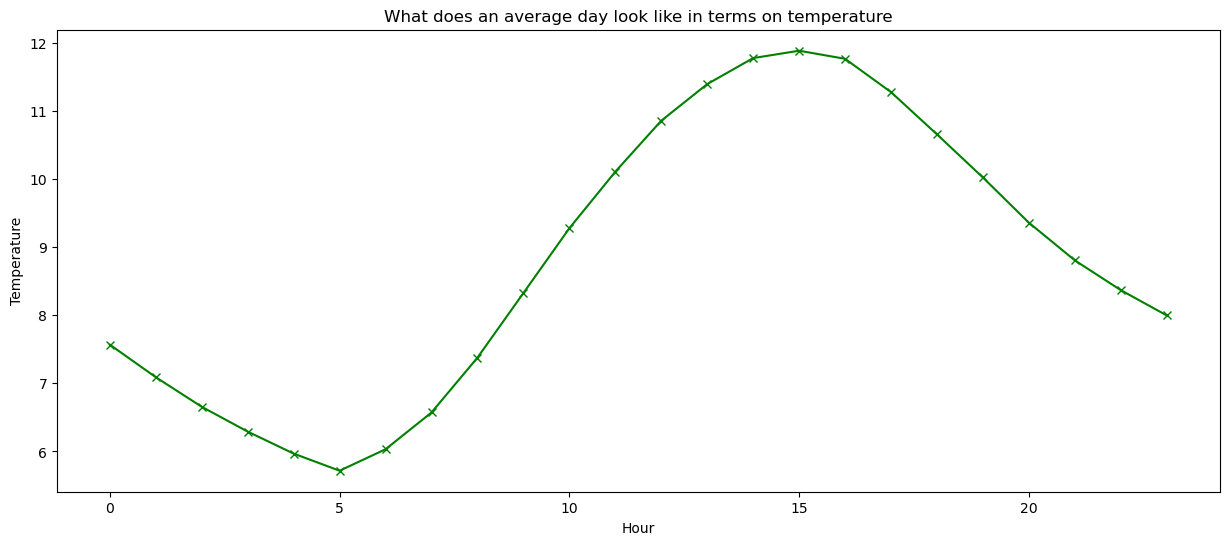

In [ ]:
# What does an average day in 2012 look like in terms of Temperature

data['hour'] = pd.to_datetime(data['date']).dt.hour
avg_temp = data.groupby('hour')['temp'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
avg_temp.plot(kind = 'line', marker = 'x', color = 'green')
plt.title("What does an average day look like in terms on temperature")
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.show()

original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]

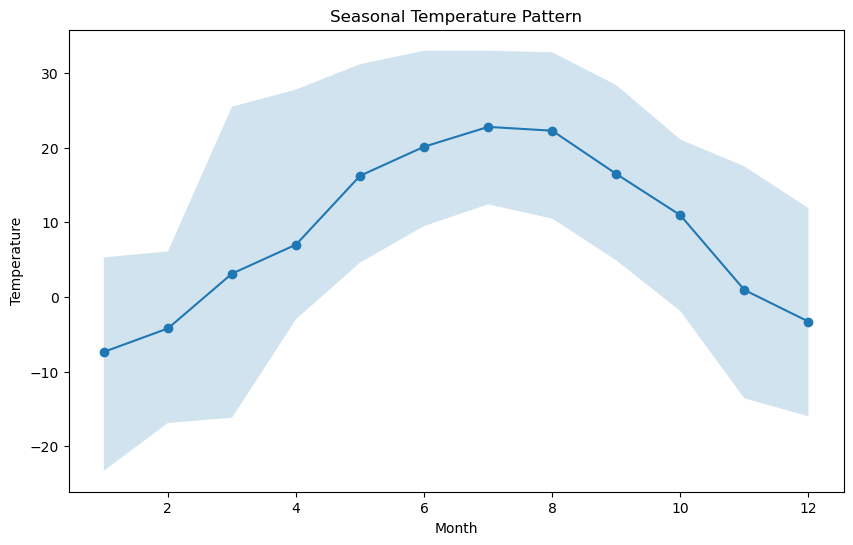

In [18]:
# Seasonal Temperature Trends 

data['month'] = pd.to_datetime(data['date']).dt.month
monthly_avg = data.groupby('month')['temp'].agg(['mean', 'min', 'max'])

plt.figure(figsize = (10, 6))
plt.plot(monthly_avg.index, monthly_avg['mean'], marker = 'o', label = 'average')
plt.fill_between(monthly_avg.index, monthly_avg['min'], monthly_avg['max'], alpha = 0.2)
plt.title('Seasonal Temperature Pattern')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# We see that mid-year is the hottest time of the year


original_columns = ['date', 'temp', 'dew_point_temp', 'rel_hum', 'wind_speed', 'visibility_km', 'press_kpa', 'weather']
data = data[original_columns]

<Axes: >

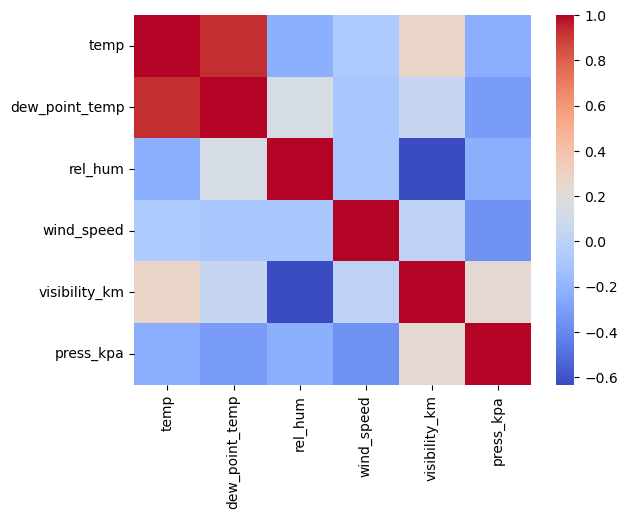

In [ ]:
# How each factors are related to each other 

import seaborn as sns

corr_matrix = data.select_dtypes(include = 'number').corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm')

# dew point temperature and temperature seems to be the most related columns

wind_category
Calm      4837
Breezy    3199
Windy      395
Storm       44
Name: count, dtype: int64


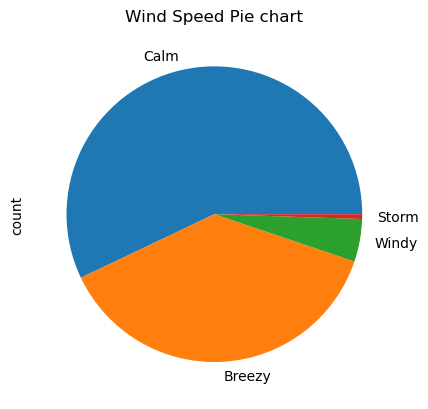

In [ ]:
# Wind speed throughout the year

import matplotlib.pyplot as plt

data['wind_category'] = pd.cut(data['wind_speed'], bins = [0, 15, 30, 45, 100], labels = ['Calm', 'Breezy', 'Windy', "Storm"])

count = data['wind_category'].value_counts()
count.plot(kind = 'pie')
plt.title('Wind Speed Pie chart')
print(count)


# The pie chart shows us that in 2012, most days had a calm wind speed 

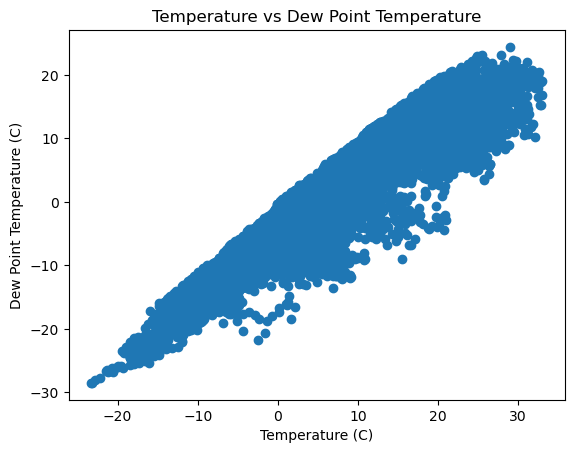

In [ ]:
# Relationship between temperature and dew point temperature

plt.scatter(data['temp'], data['dew_point_temp'])
plt.xlabel('Temperature (C)')
plt.ylabel('Dew Point Temperature (C)')
plt.title('Temperature vs Dew Point Temperature')
plt.show()

# We can see that as temperature increase dew point temperature also increases

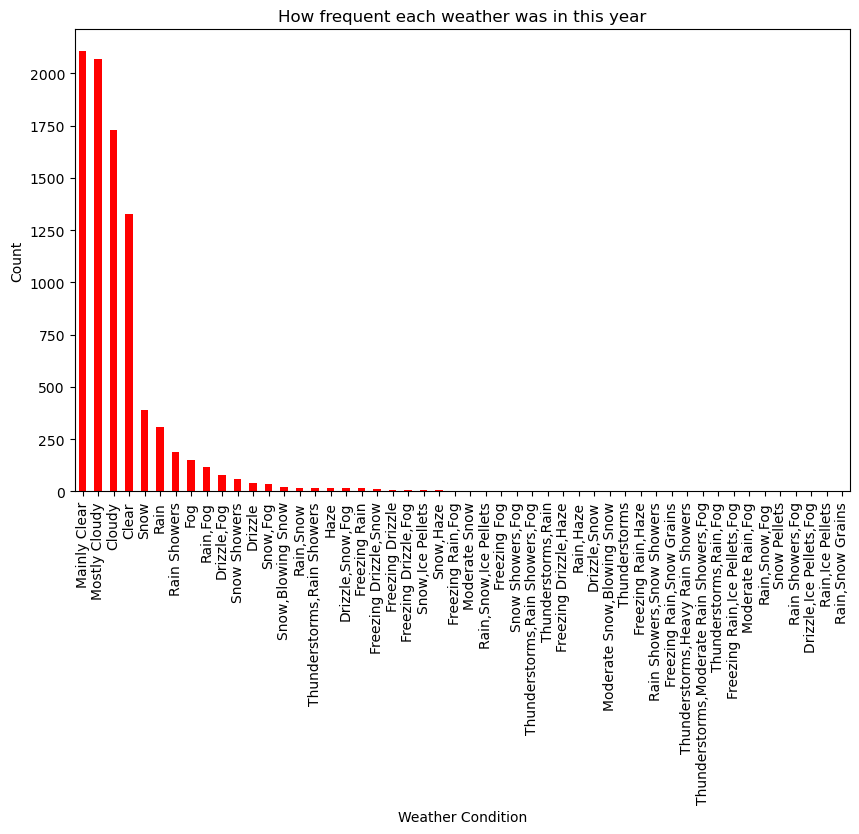

In [ ]:
# How frequent was each weather in 2012

import matplotlib.pyplot as plt

weather_counts = data['weather'].value_counts()
plt.figure(figsize=(10, 6))
weather_counts.plot(kind = 'bar', color = 'red')
plt.title('How frequent each weather was in this year')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# Most days were clear or cloudy
